In [1]:
import pandas as pd
from pathlib import Path
import networkx as nx
from collections import defaultdict
from collections import Counter
from tqdm import tqdm
import pickle as pk
import numpy as np
from datetime import datetime as dt
from geopy.distance import great_circle
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000000000000000
import matplotlib.pyplot as plt
from random import sample
from random import choices
import seaborn as sns

import homophily_functions as fn
import importlib
%matplotlib inline

In [2]:
importlib.reload(fn)

<module 'homophily_functions' from '/home/quint/twitter_network/Soc science paper/homophily_functions.py'>

In [3]:
G = pk.load(open("/home/quint/twitter_network/Pickles/follower_graph.pk", "rb"))  

## By Pop in Radius

In [4]:
tie_pop = nx.get_edge_attributes(G, "radiation_pop")
rand_pop = pk.load(open("/home/quint/twitter_network/Pickles/radiation_pop_rand_labels.pk", "rb"))
rand_pop2 = pk.load(open("/home/quint/twitter_network/Pickles/radiation_pop_rand_labels_2.pk", "rb"))

#### combine two random samples of dyads with pop in radius for more statistical power
rand_pop.update(rand_pop2)


In [9]:
all_r_nodes = set([x[0] for x in rand_pop] + [x[1] for x in rand_pop])

In [10]:
len(all_r_nodes)

1060665

In [12]:
len(all_r_nodes.difference(set(G.nodes())))

15014

In [6]:
'2337813961' in G.nodes()

False

In [7]:
factor = len(rand_pop)/(len(G)*len(G))

In [9]:
bins_tab = [(0,1e5), (1e5, 5e5), (5e5, 1e6), (1e6, 1e7), (1e7, 1e8), (1e8, 1e8*4) ]

binned_random_distance = fn.bin_distance(rand_pop, bins_tab)[0]
binned_distance = fn.bin_distance(tie_pop, bins_tab)[0]

In [10]:
[len(bin) for bin in binned_distance]

[710415, 1102793, 697766, 2714183, 4291842, 7996275]

In [11]:
[len(bin) for bin in binned_random_distance]

[10034, 51788, 64635, 1045660, 10080234, 23564429]

In [12]:
bins_lab = [('0', "100K"), ("100K", "500K"), ("500K", "1M"),
            ("1M", "10M"), ("10M", "100M"), ("100M", "400M")]

In [48]:
out = fn.generate_table_by_distance("party_id", G, tie_pop, rand_pop,
                                    bins_tab, factor,
                                    ['Democrat','Independent','Republican' ])

###########generate_table_by_distance##########
Initialization
Binning
Getting density tables
Bin  0  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dyads in the network##########
Bin  1  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dyads in the network##########
Bin  2  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dyads in the network##########
Bin  3  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dyads in the network##########
Bin  4  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dy

True

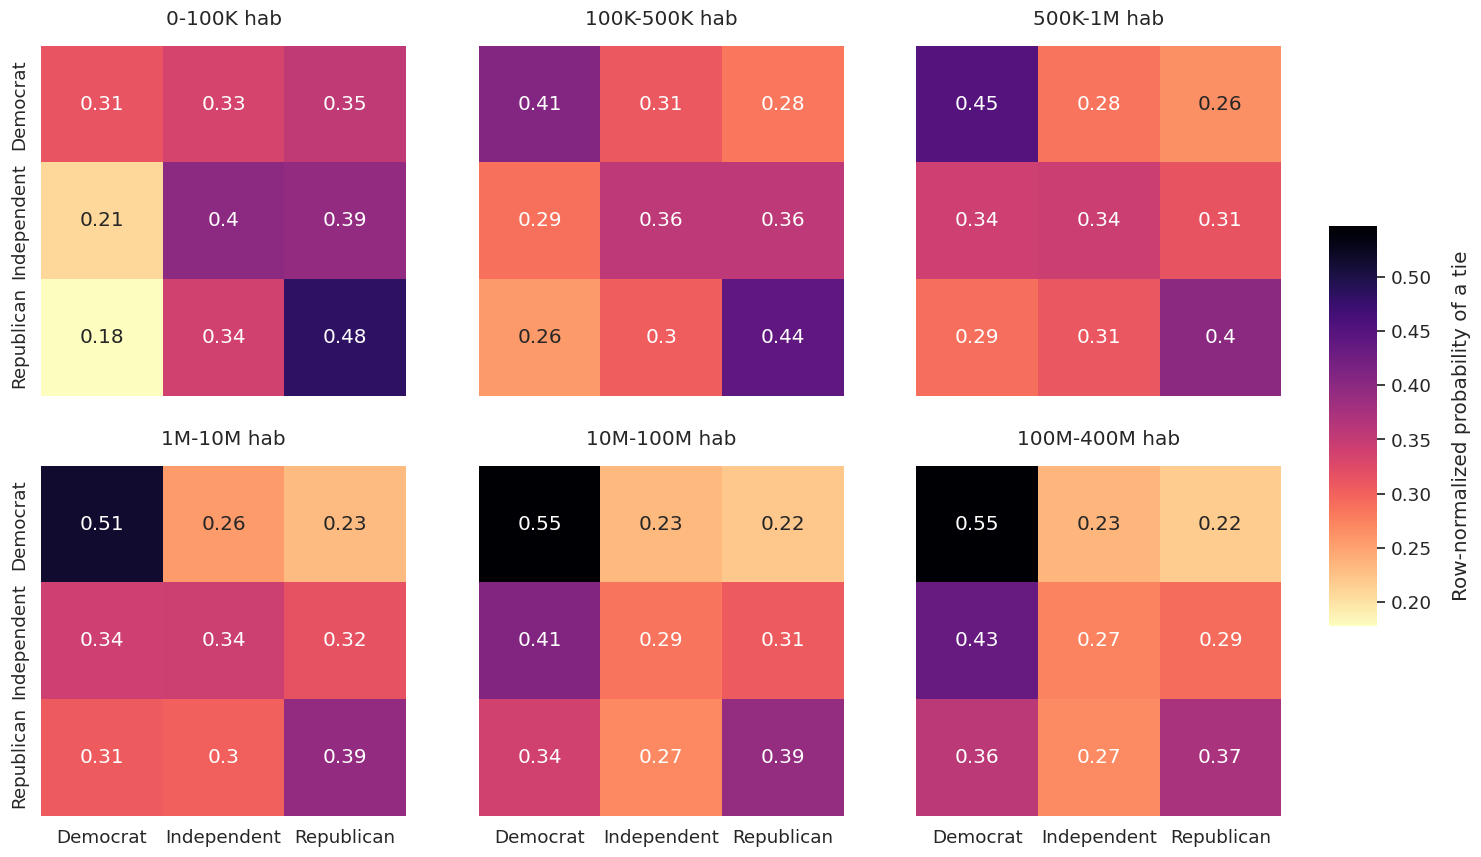

In [52]:
fn.genreate_heatmaps_by_distance("Partisanship", out, bins = bins_lab, unit = "hab",
                                 is_row_normal = True, sup = " by population in radius", font_scale = 1.2,
                                 xticklabels=['Democrat','Independent','Republican' ], title = False,
                                file_name = "Plots/Trivariate/pop_party_rownorm.png", size=(16,10))

In [16]:
out_party_reg = fn.generate_table_by_distance("party_reg", G, tie_pop, rand_pop,
                                    bins_tab, factor,
                                    ['Democrat','Independent','Republican'])

###########generate_table_by_distance##########
Initialization
Binning
Getting density tables
Bin  0  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dyads in the network##########
Bin  1  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dyads in the network##########
Bin  2  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dyads in the network##########
Bin  3  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dyads in the network##########
Bin  4  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dy

True

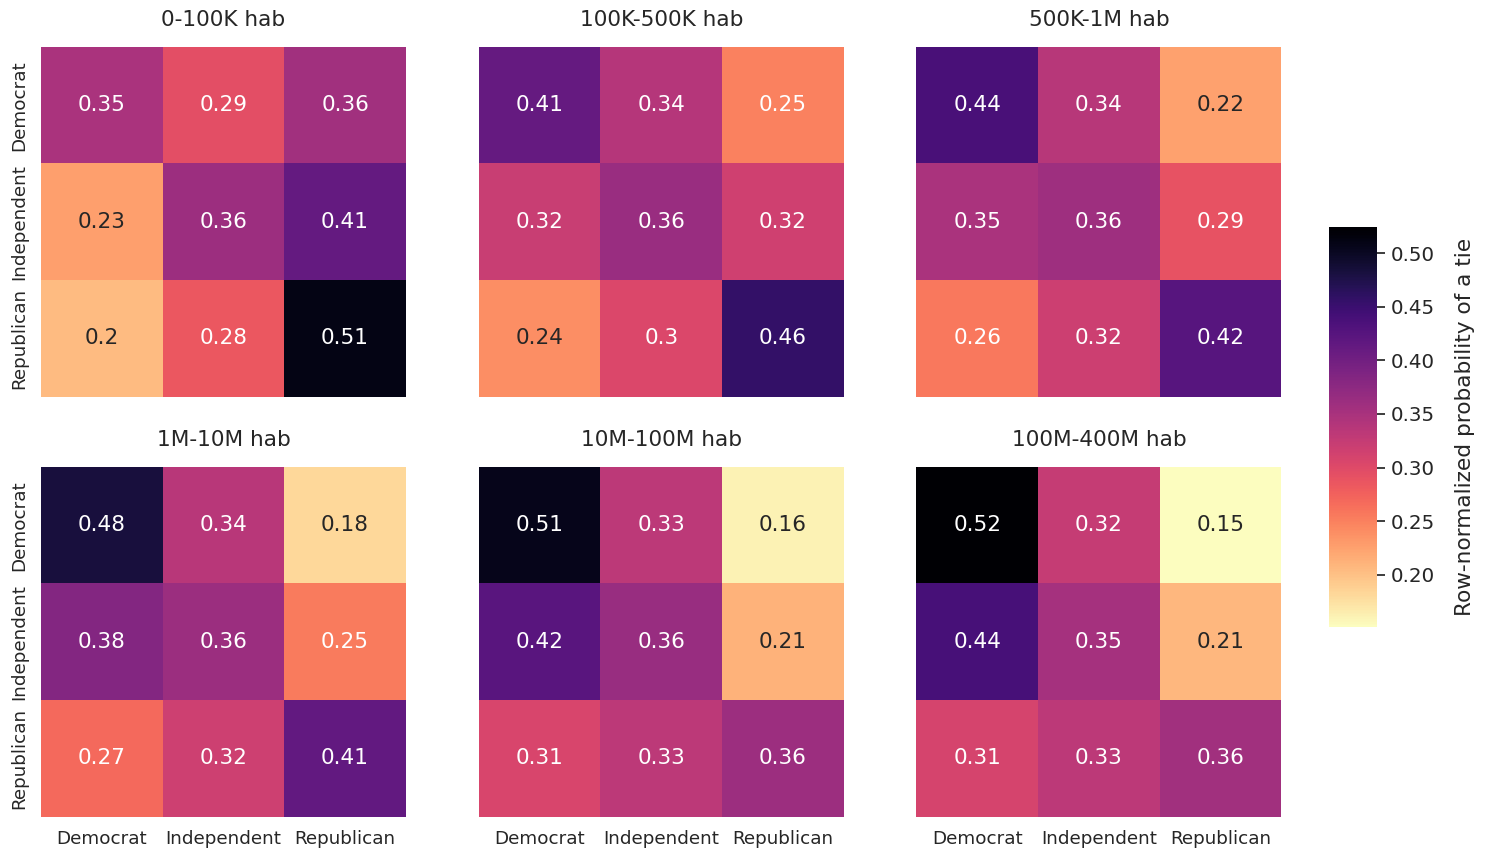

In [18]:
fn.genreate_heatmaps_by_distance("Party registration", out_party_reg, bins = bins_lab, unit = "hab",
                                 is_row_normal = True, sup = " by population in radius", font_scale = 1.3,
                                 xticklabels=['Democrat','Independent','Republican' ], title = False,
                                file_name = "Plots/Trivariate/pop_party_reg_rownorm.png", size=(16,10))

In [53]:
out_ruca = fn.generate_table_by_distance("ruca_urbanicity", G, tie_pop, rand_pop,
                                    bins_tab, factor,
                                    ['metropolitan','micropolitan','small_town/rural'])
out_ruca = [df.loc[~((df.index == "not_coded") | (pd.isna(df.index))), ~((df.columns == "not_coded") | (pd.isna(df.columns)))] for df in out_ruca] 

###########generate_table_by_distance##########
Initialization
Binning
Getting density tables
Bin  0  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dyads in the network##########
Bin  1  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dyads in the network##########
Bin  2  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dyads in the network##########
Bin  3  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dyads in the network##########
Bin  4  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dy

In [55]:
for df in out_ruca:
    df.columns = ['Metropolitan','Micropolitan','Small town/rural']
    df.index = ['Metropolitan','Micropolitan','Small town/rural']

True

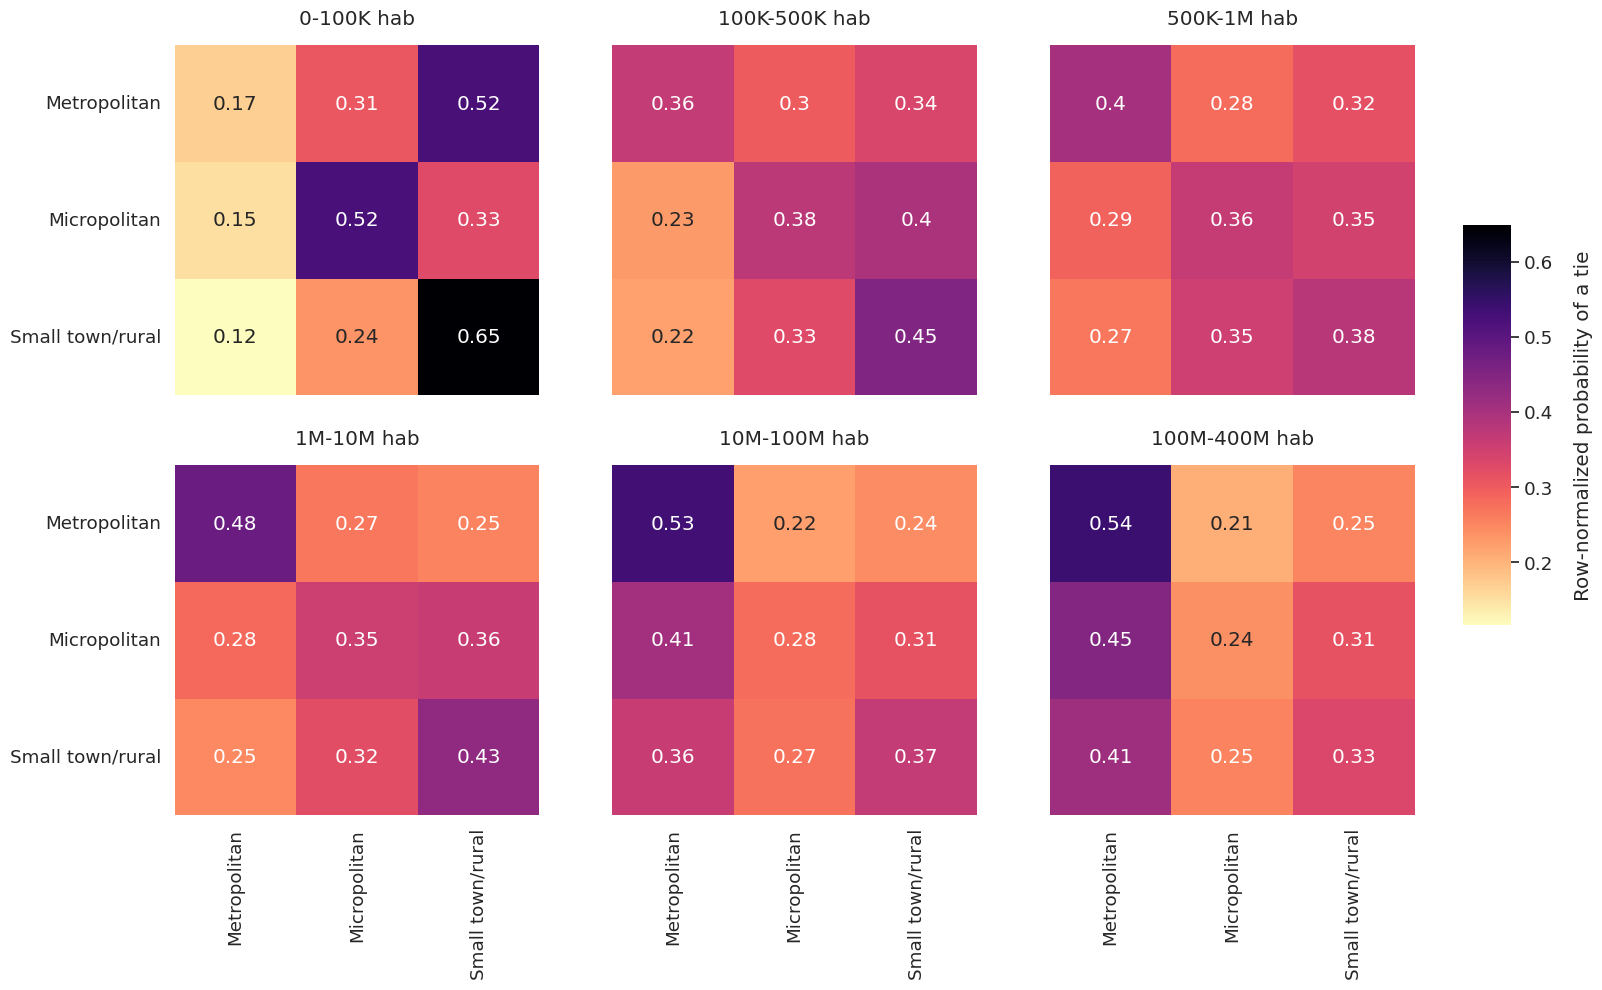

In [56]:
fn.genreate_heatmaps_by_distance("RUCA code", out_ruca, bins = bins_lab, unit = "hab",
                                 is_row_normal = True, sup = " by population in radius", font_scale = 1.2,
                                 xticklabels=['Metropolitan','Micropolitan','Small town/rural'], title = False,
                                file_name = "Plots/Trivariate/pop_ruca_rownorm.png", size=(16,10))

In [ ]:
out_race = fn.generate_table_by_distance("race", G, tie_pop, rand_pop,
                                    bins_tab, factor,
                                    ['Caucasian','Hispanic','African-American','Asian','Other'])

###########generate_table_by_distance##########
Initialization
Binning
Getting density tables
Bin  0  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dyads in the network##########
Bin  1  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dyads in the network##########
Bin  2  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dyads in the network##########
Bin  3  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dyads in the network##########
Bin  4  processed
###########diadic_density_bin_distance##########
###########Calculates total number of possible dyad##########
###########Counts how many dy

In [ ]:
out_race = [df.loc[~((df.index == "not_coded") | (pd.isna(df.index)) | (df.index == "Other") | (df.index == "Native American")),
                   ~((df.columns == "not_coded") | (pd.isna(df.columns)) | (df.columns == "Other") | (df.columns == "Native American"))] for df in out_race] 

True

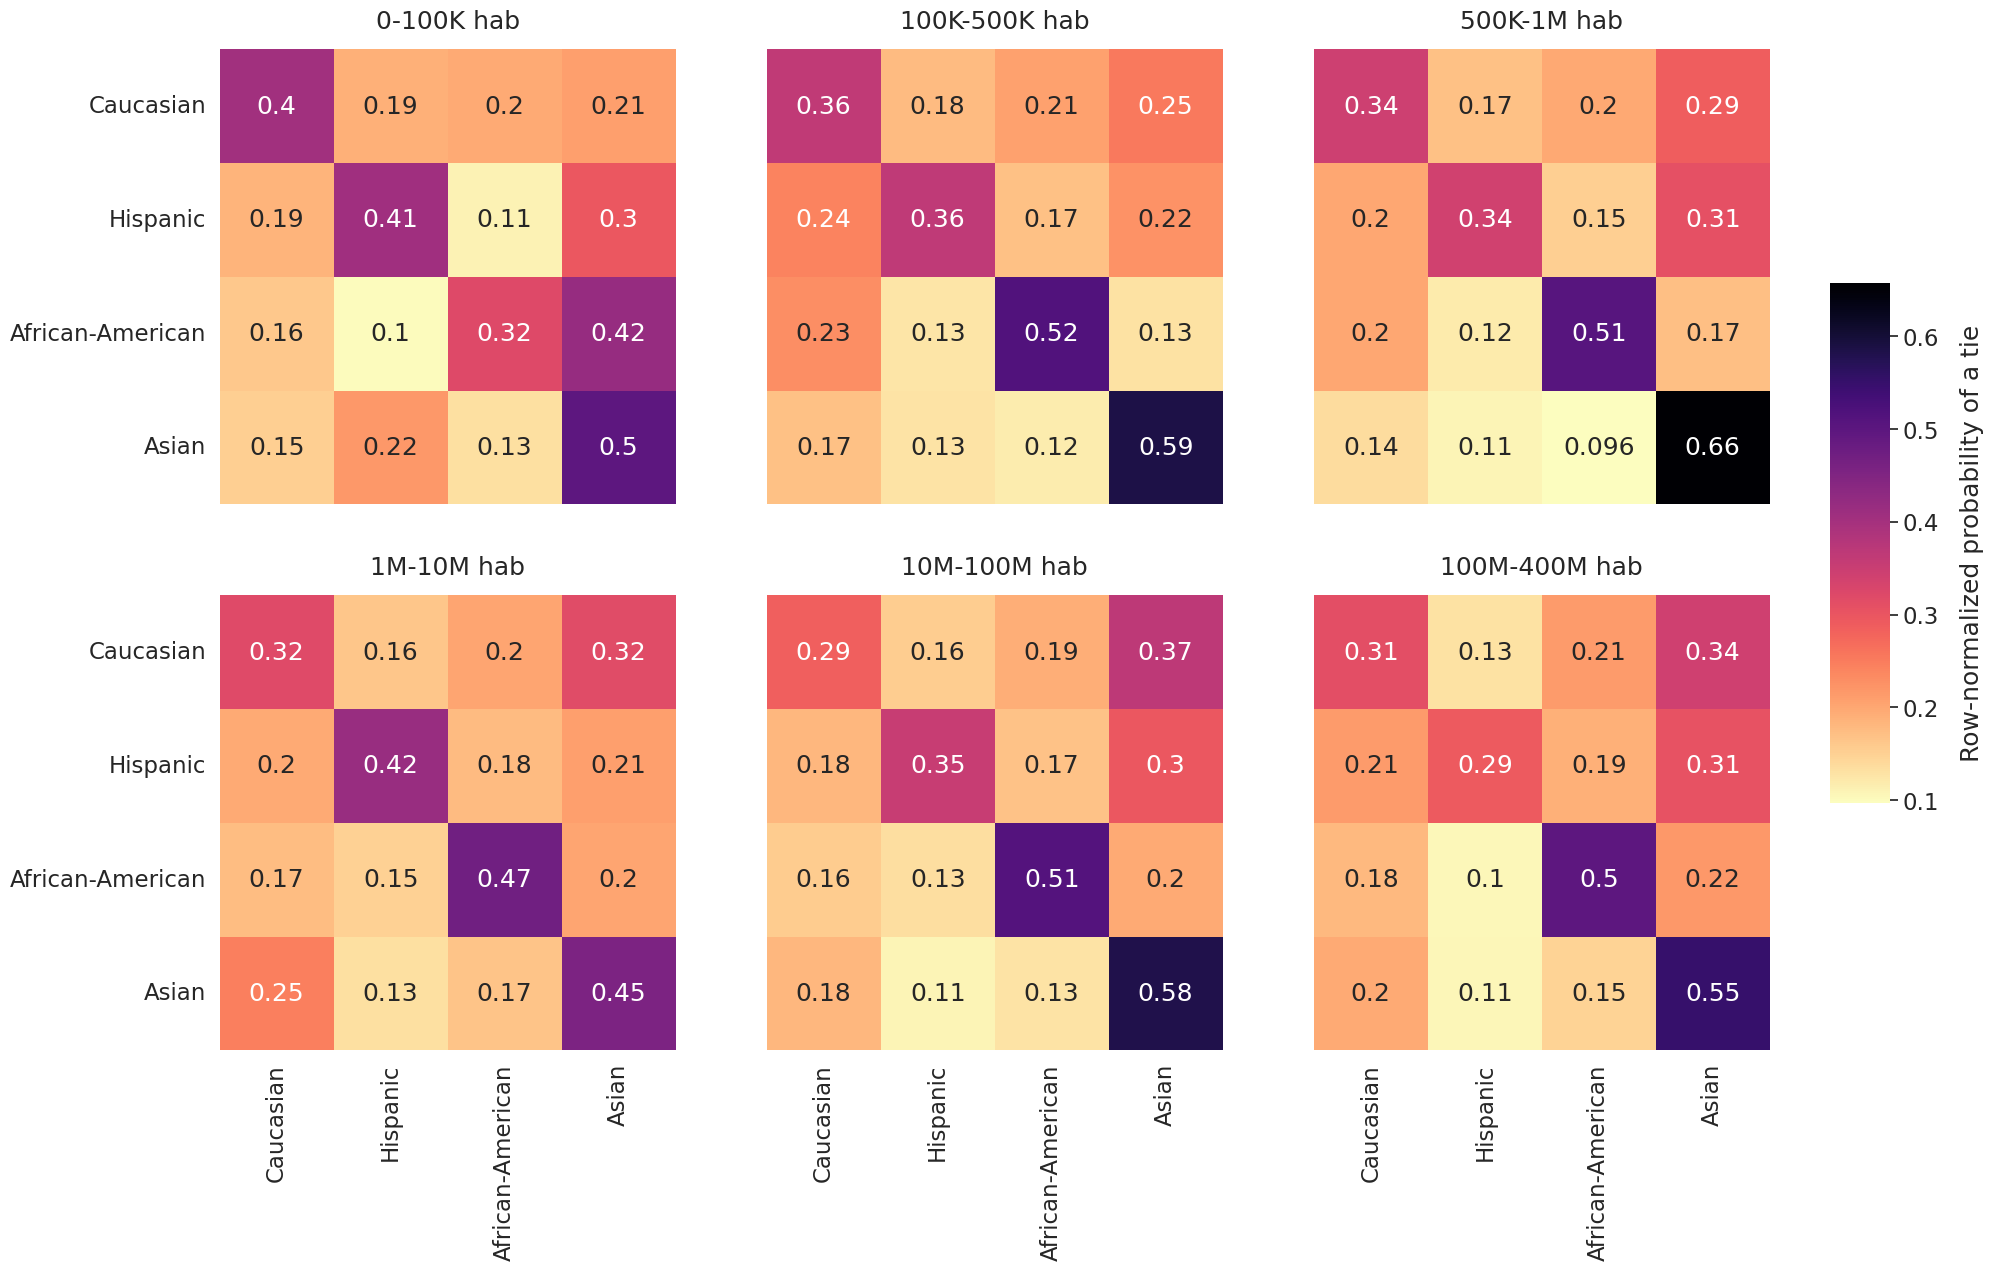

In [62]:
fn.genreate_heatmaps_by_distance("Race/ethnicity", out_race, bins = bins_lab, unit = "hab",
                                 is_row_normal = True, sup = " by population in radius", title = False,
                                file_name = "Plots/Trivariate/pop_race_rownorm.png")

## ELECTION TWEETS BY PARTISANSHIP

In [4]:
pol_tweets = nx.get_node_attributes(G, "pol_tweets")

In [5]:
pol_tweets_bin = {node:None for node,val in pol_tweets.items()}
for key,val in pol_tweets.items():
    if val == 0:
        pol_tweets_bin[key] = "0"
    if val > 0 and val <=10:
        pol_tweets_bin[key] = "1-10"
    if val > 10 and val <=50:
        pol_tweets_bin[key] = "11-50"
    if val > 50:
        pol_tweets_bin[key] = "More than 50"

In [6]:
nx.set_node_attributes(G, pol_tweets_bin, "pol_tweets_bin")

In [7]:
party_tweets = fn.diadic_density_two_vars("party_id", "pol_tweets_bin", G)

100%|█████████████████████████████████████████████████████████████████████████████| 17547086/17547086 [00:39<00:00, 448191.08it/s]


In [8]:
edges = fn.get_table(party_tweets[2], reciprocal = False)
edges.index = pd.MultiIndex.from_tuples(edges.index)
edges.columns = pd.MultiIndex.from_tuples(edges.columns)
edges = edges.groupby(level=0, axis=1).sum()

/home/quint/twitter_network/Soc science paper/homophily_functions.py:108: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  vals = pd.unique([pair[0] for pair in pairs])
/tmp/ipykernel_2684772/1780601112.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  edges = edges.groupby(level=0, axis=1).sum()


In [16]:
dyads = fn.get_table(party_tweets[1], reciprocal = False)
dyads.index = pd.MultiIndex.from_tuples(dyads.index)
dyads.columns = pd.MultiIndex.from_tuples(dyads.columns)
dyads = dyads.groupby(level=0, axis=1).sum()

/home/quint/twitter_network/Soc science paper/homophily_functions.py:108: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  vals = pd.unique([pair[0] for pair in pairs])
/tmp/ipykernel_2684772/946603436.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  dyads = dyads.groupby(level=0, axis=1).sum()


In [18]:
density = edges.divide(dyads)

In [19]:
print(sum([x==0 for x in pol_tweets.values()]))

851610


In [20]:
print(sum([x>0 and x<=10 for x in pol_tweets.values()]))

144082


In [21]:
print(sum([x>10 and x<=50 for x in pol_tweets.values()]))

34568


In [22]:
print(sum([x>50 for x in pol_tweets.values()]))

20998


In [23]:
tweets = []
dfs = []
for t1 in ['0','1-10', '11-50',"More than 50"]:
    df = density.xs(t1, level = 1)
    df = df.loc[["Democrat","Independent","Republican"], ["Democrat","Independent","Republican"]]
    dfs.append(df)
    tweets.append("{x} political tweets".format(x=t1))

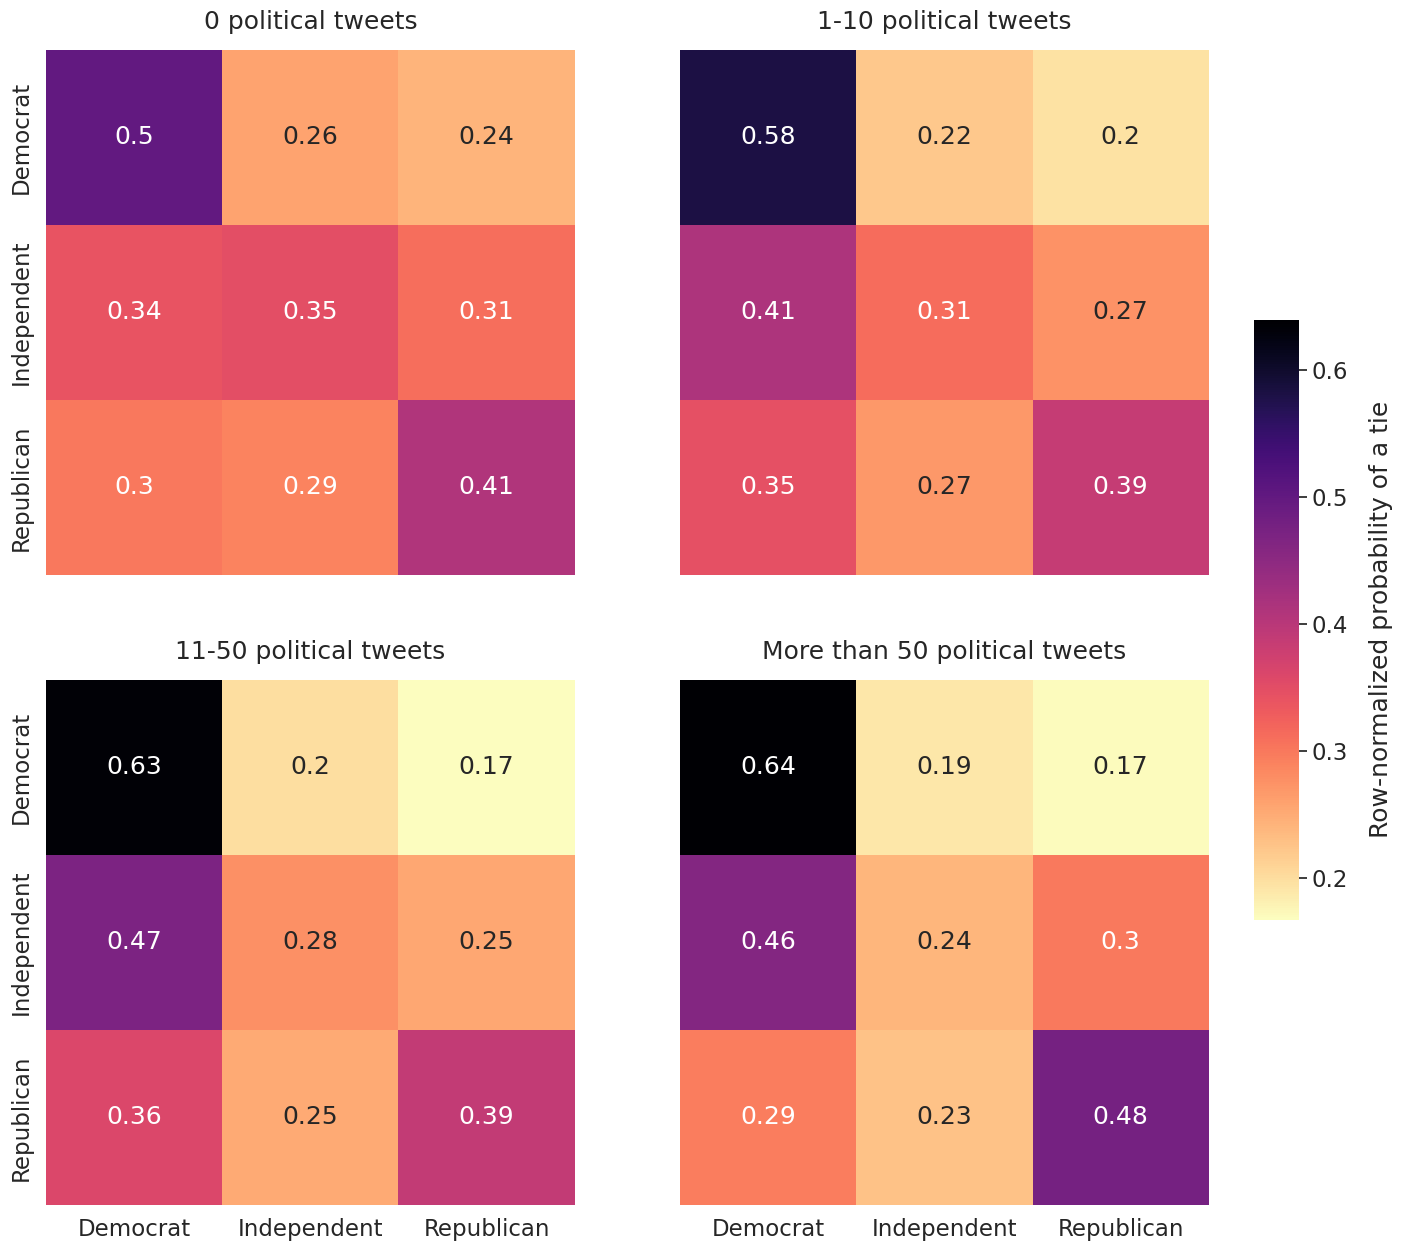

In [27]:
df_list_cp = dfs.copy()

nrows = 2
ncols = 2
min_value = []
max_value = []
for i in range(len(df_list_cp)):
    df_list_cp[i] = df_list_cp[i].div(df_list_cp[i].sum(axis=1), axis = 0)
    label = "Row-normalized probability of a tie"
    min_value.append(df_list_cp[i].values.min())
    max_value.append(df_list_cp[i].values.max())
vmin = min(min_value)
vmax = max(max_value)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))
sns.set(font_scale=1.5) 
      
cbar_ax = fig.add_axes([.93, .3, .03, .4])
    
idx = 0
for i in range(nrows):
    for j in range(ncols):
        if idx >= len(df_list_cp):
            break
        sns.heatmap(df_list_cp[idx].astype(float), ax = ax[i][j], annot=True, xticklabels= i==nrows-1, yticklabels= j==0, cmap="magma_r", 
                    vmin=vmin, vmax=vmax, cbar =  i+j==2, cbar_ax = None if i+j<2 else cbar_ax)
        ax[i, j].set_title(tweets[idx], pad = 15)
        idx += 1

label = "Row-normalized probability of a tie"

cbar = ax[1,1].collections[0].colorbar
cbar.set_label(label, labelpad=15)

        
fig.savefig("Plots/Trivariate/party_tweets.png",bbox_inches='tight', dpi=300, facecolor='white', transparent=False)

In [14]:
nodes = [key for key,val in pol_tweets.items() if val>=10]
H = G.subgraph(nodes).copy()
party_hom = fn.diadic_density("party_id", H)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1943028/1943028 [00:03<00:00, 637280.75it/s]


In [15]:
fn.get_table(party_hom[0]).astype(float)

,Democrat,Independent,Republican
Democrat,0.000735,0.000334,0.000211
Independent,0.000417,0.000321,0.000323
Republican,0.000300,0.000350,0.000634


In [18]:
fn.get_table(party_hom[2])

,Democrat,Independent,Republican
Democrat,1237010,78908,130178
Independent,98633,10670,28047
Republican,185289,30418,143875


In [20]:
len(H.edges())

1943028

## Party reg by political tweets

In [28]:
reg_tweets = fn.diadic_density_two_vars("party_reg", "pol_tweets_bin", G)

100%|███████████████████████████████████████████████████████████████████████████████| 8586229/8586229 [00:20<00:00, 425198.95it/s]


In [29]:
edges = fn.get_table(reg_tweets[2], reciprocal = False)
edges.index = pd.MultiIndex.from_tuples(edges.index)
edges.columns = pd.MultiIndex.from_tuples(edges.columns)
edges = edges.groupby(level=0, axis=1).sum()

/home/quint/twitter_network/Soc science paper/homophily_functions.py:108: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  vals = pd.unique([pair[0] for pair in pairs])
/tmp/ipykernel_2684772/3491520595.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  edges = edges.groupby(level=0, axis=1).sum()


In [30]:
dyads = fn.get_table(reg_tweets[1], reciprocal = False)
dyads.index = pd.MultiIndex.from_tuples(dyads.index)
dyads.columns = pd.MultiIndex.from_tuples(dyads.columns)
dyads = dyads.groupby(level=0, axis=1).sum()

/home/quint/twitter_network/Soc science paper/homophily_functions.py:108: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  vals = pd.unique([pair[0] for pair in pairs])
/tmp/ipykernel_2684772/270232329.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  dyads = dyads.groupby(level=0, axis=1).sum()


In [31]:
density = edges.divide(dyads)

In [32]:
tweets = []
dfs = []
for t1 in ['0','1-10', '11-50',"More than 50"]:
    df = density.xs(t1, level = 1)
    df = df.loc[["Democrat","Independent","Republican"], ["Democrat","Independent","Republican"]]
    dfs.append(df)
    tweets.append("{x} political tweets".format(x=t1))

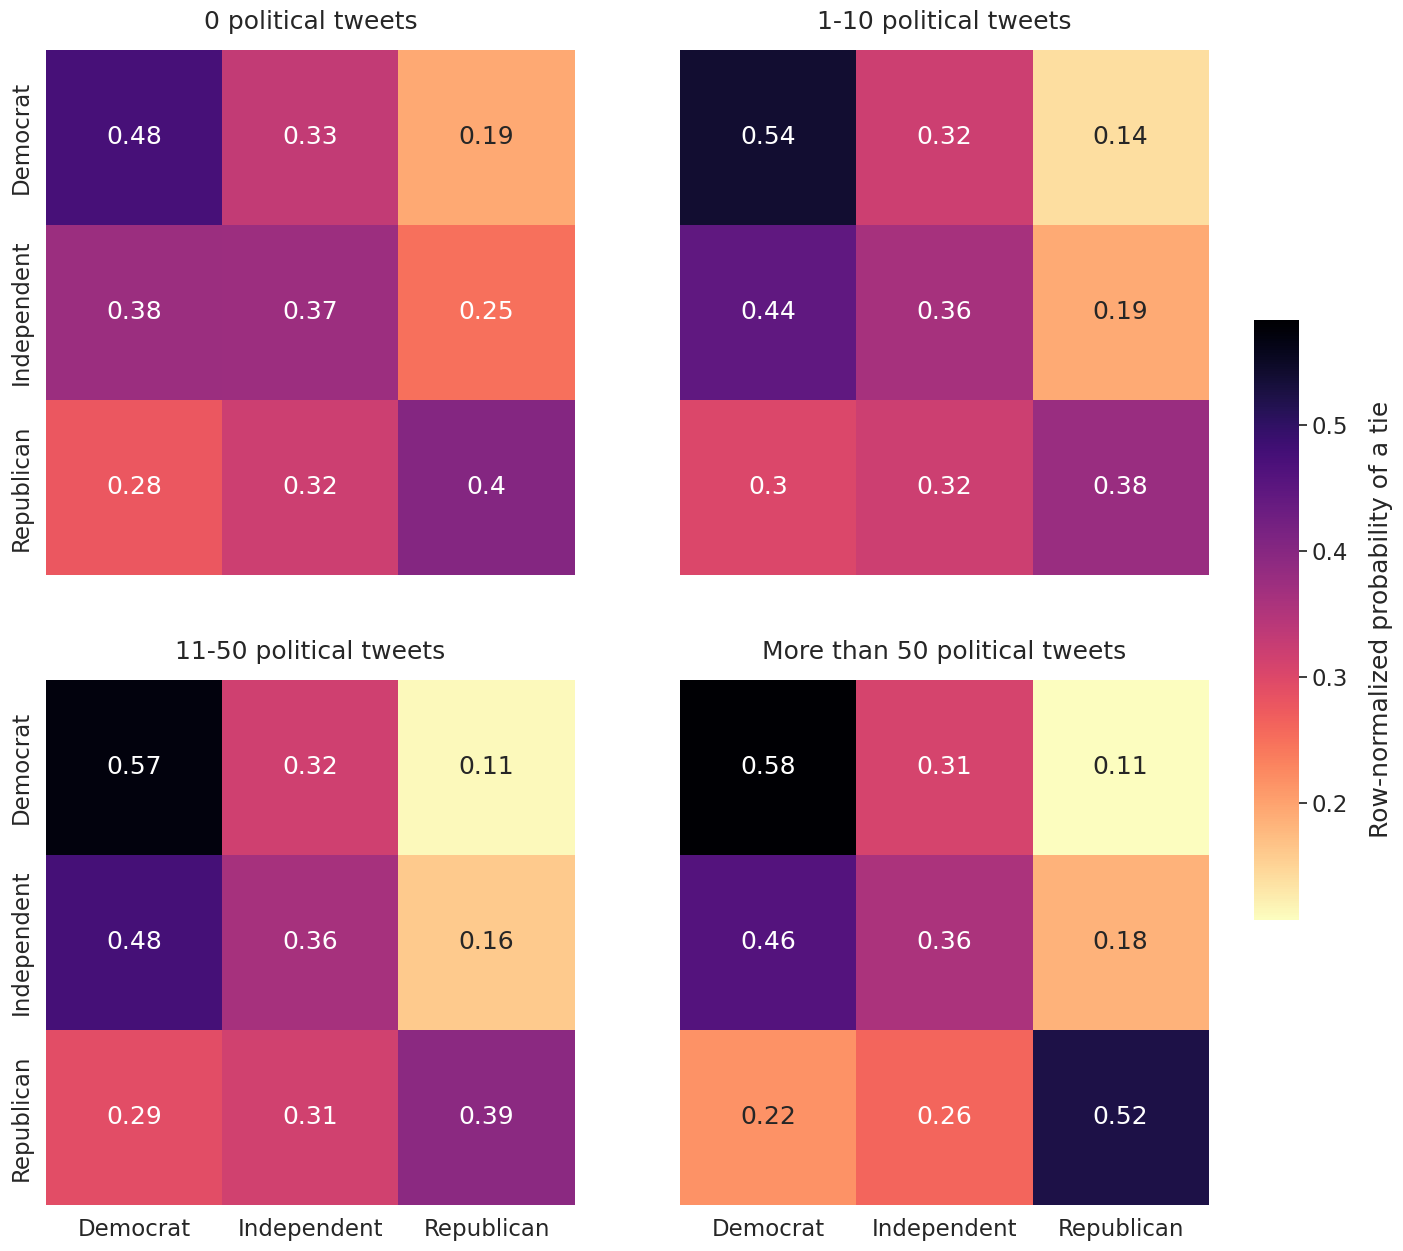

In [33]:
df_list_cp = dfs.copy()

nrows = 2
ncols = 2
min_value = []
max_value = []
for i in range(len(df_list_cp)):
    df_list_cp[i] = df_list_cp[i].div(df_list_cp[i].sum(axis=1), axis = 0)
    label = "Row-normalized probability of a tie"
    min_value.append(df_list_cp[i].values.min())
    max_value.append(df_list_cp[i].values.max())
vmin = min(min_value)
vmax = max(max_value)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))
sns.set(font_scale=1.5) 
      
cbar_ax = fig.add_axes([.93, .3, .03, .4])
    
idx = 0
for i in range(nrows):
    for j in range(ncols):
        if idx >= len(df_list_cp):
            break
        sns.heatmap(df_list_cp[idx].astype(float), ax = ax[i][j], annot=True, xticklabels= i==nrows-1, yticklabels= j==0, cmap="magma_r", 
                    vmin=vmin, vmax=vmax, cbar =  i+j==2, cbar_ax = None if i+j<2 else cbar_ax)
        ax[i, j].set_title(tweets[idx], pad = 15)
        idx += 1

label = "Row-normalized probability of a tie"

cbar = ax[1,1].collections[0].colorbar
cbar.set_label(label, labelpad=15)

        
fig.savefig("Plots/Trivariate/party_reg_tweets.png",bbox_inches='tight', dpi=300, facecolor='white', transparent=False)